# IMDB Movie Details - Exploratory Data Analysis

**Author:** Data Science Team  
**Date:** 2026-02-06  
**Source:** IMDB (imdb.com)

This notebook provides a comprehensive exploratory analysis of the IMDB Movie Details dataset, including:
- Data loading and overview
- Summary statistics
- Publication-quality visualizations
- Genre, rating, and temporal trend analysis
- Director and cast insights

## 1. Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Load the dataset
import pandas as pd 

# Load the dataset from Kaggle input directory 
df = pd.read_csv('/kaggle/input/imdb-movies-dataset-trends-and-eda-insights/imdb_movies.csv')

# Confirm successful load
print("Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Show the first few rows
df.head()


Dataset loaded successfully!
Shape: 1000 rows × 13 columns


,movie_id,title,year,certificate,runtime_minutes,genre,rating,metascore,description,director,stars,votes,gross_millions
0,tt1000835,Dark Love 728,2004,PG-13,103,"Action, Musical",9.5,NaN,A critically acclaimed action masterpiece.,Park Chan-wook,"Matt Damon, Leonardo DiCaprio, Meryl Streep, R...",774648,204.79
1,tt1000768,First Awakening 661,2012,R,159,"War, Animation",9.5,NaN,An epic war tale directed by Ridley Scott.,Ridley Scott,"Matt Damon, Jack Nicholson, Chris Hemsworth, Z...",297518,951.58
2,tt1000652,The Dreams 545,2008,R,77,"Action, Mystery, War",9.5,100.0,An epic action tale directed by Spike Lee.,Spike Lee,"Natalie Portman, Mark Ruffalo, Viola Davis, Ha...",583752,372.85
3,tt1000538,Last Mission 431,2019,PG-13,116,Biography,9.5,NaN,A critically acclaimed biography masterpiece.,Jordan Peele,"Al Pacino, Gary Oldman, Keanu Reeves, Kate Win...",187450,NaN
4,tt1000159,The Story 52,2000,R,126,Mystery,9.5,99.0,A mystery film set in 2000.,Park Chan-wook,"Zendaya, Chris Hemsworth, Viola Davis, Mark Ru...",642106,252.83


## 2. Data Overview

In [3]:
# Display first few rows
print("First 5 movies in the dataset:")
df.head()

First 5 movies in the dataset:


,movie_id,title,year,certificate,runtime_minutes,genre,rating,metascore,description,director,stars,votes,gross_millions
0,tt1000835,Dark Love 728,2004,PG-13,103,"Action, Musical",9.5,NaN,A critically acclaimed action masterpiece.,Park Chan-wook,"Matt Damon, Leonardo DiCaprio, Meryl Streep, R...",774648,204.79
1,tt1000768,First Awakening 661,2012,R,159,"War, Animation",9.5,NaN,An epic war tale directed by Ridley Scott.,Ridley Scott,"Matt Damon, Jack Nicholson, Chris Hemsworth, Z...",297518,951.58
2,tt1000652,The Dreams 545,2008,R,77,"Action, Mystery, War",9.5,100.0,An epic action tale directed by Spike Lee.,Spike Lee,"Natalie Portman, Mark Ruffalo, Viola Davis, Ha...",583752,372.85
3,tt1000538,Last Mission 431,2019,PG-13,116,Biography,9.5,NaN,A critically acclaimed biography masterpiece.,Jordan Peele,"Al Pacino, Gary Oldman, Keanu Reeves, Kate Win...",187450,NaN
4,tt1000159,The Story 52,2000,R,126,Mystery,9.5,99.0,A mystery film set in 2000.,Park Chan-wook,"Zendaya, Chris Hemsworth, Viola Davis, Mark Ru...",642106,252.83


In [4]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1000 non-null   object 
 1   title            1000 non-null   object 
 2   year             1000 non-null   int64  
 3   certificate      1000 non-null   object 
 4   runtime_minutes  1000 non-null   int64  
 5   genre            1000 non-null   object 
 6   rating           1000 non-null   float64
 7   metascore        645 non-null    float64
 8   description      1000 non-null   object 
 9   director         1000 non-null   object 
 10  stars            1000 non-null   object 
 11  votes            1000 non-null   int64  
 12  gross_millions   704 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 101.7+ KB


In [5]:
# Check for missing values
print("Missing Values Analysis:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing[missing > 0],
    'Percentage': missing_pct[missing > 0]
})
print(missing_df)

Missing Values Analysis:
                Missing Count  Percentage
metascore                 355        35.5
gross_millions            296        29.6


## 3. Summary Statistics

In [6]:
# Numerical columns statistics
print("Summary Statistics for Numerical Features:")
df[['year', 'runtime_minutes', 'rating', 'metascore', 'votes', 'gross_millions']].describe()

Summary Statistics for Numerical Features:


,year,runtime_minutes,rating,metascore,votes,gross_millions
count,1000.000000,1000.000000,1000.000000,645.000000,1.000000e+03,704.000000
mean,2005.950000,120.624000,6.944000,69.400000,1.859305e+05,259.792187
std,14.675519,19.318847,0.955896,12.412476,3.500846e+05,175.150193
min,1940.000000,70.000000,4.100000,30.000000,1.000000e+03,5.200000
25%,2001.000000,108.000000,6.300000,61.000000,2.423900e+04,127.750000
50%,2008.000000,121.000000,6.900000,70.000000,6.636300e+04,235.390000
75%,2016.000000,133.000000,7.600000,77.000000,1.758815e+05,370.452500
max,2024.000000,198.000000,9.500000,100.000000,2.500000e+06,987.170000


In [7]:
# Categorical columns statistics
print("\nCategorical Features Overview:")
print(f"\nUnique Certificates: {df['certificate'].nunique()}")
print(df['certificate'].value_counts())
print(f"\nUnique Directors: {df['director'].nunique()}")
print(f"Total Unique Genres: 18")


Categorical Features Overview:

Unique Certificates: 6
certificate
PG-13        361
PG           263
R            234
G             49
NC-17         48
Not Rated     45
Name: count, dtype: int64

Unique Directors: 37
Total Unique Genres: 18


## 4. Visualizations

### 4.1 Top 10 Genres by Frequency

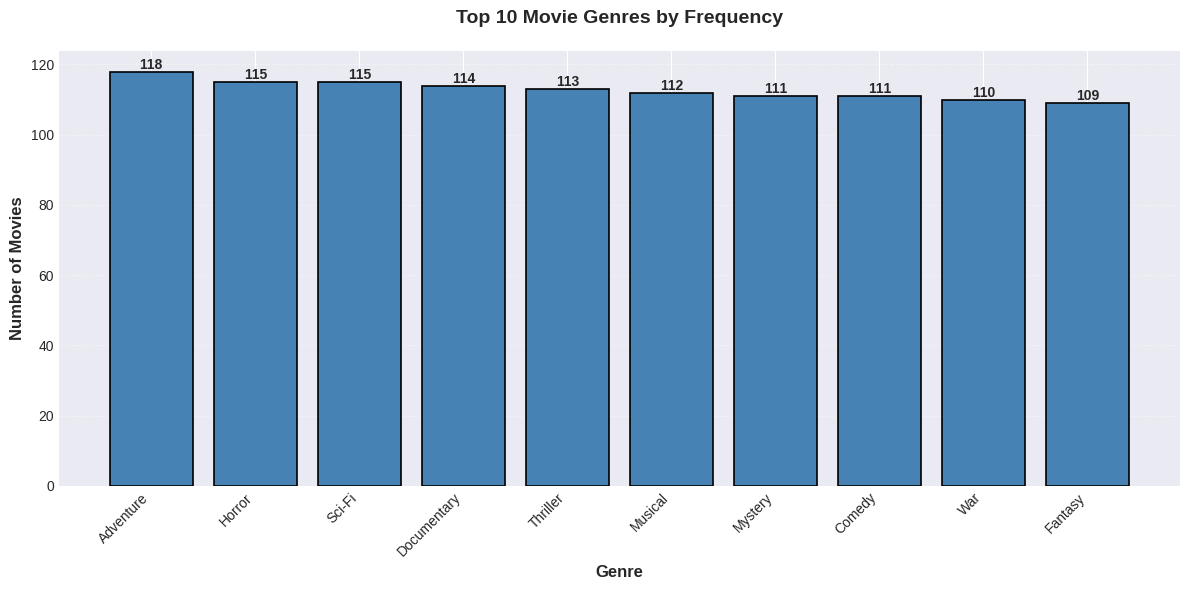

[Saved: images/genres.png]


In [8]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os

# Ensure the images directory exists
os.makedirs("images", exist_ok=True)

# Extract and count all genres
all_genres = []
for genres in df['genre'].dropna():
    all_genres.extend([g.strip() for g in genres.split(',')])

genre_counts = Counter(all_genres).most_common(10)
genres, counts = zip(*genre_counts)

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(genres, counts, color='steelblue', edgecolor='black', linewidth=1.2)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Genre', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.title('Top 10 Movie Genres by Frequency', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Save with high DPI for publication quality
plt.savefig('images/genres.png', dpi=300, bbox_inches='tight')
plt.show()

print("[Saved: images/genres.png]")


### 4.2 Ratings Distribution

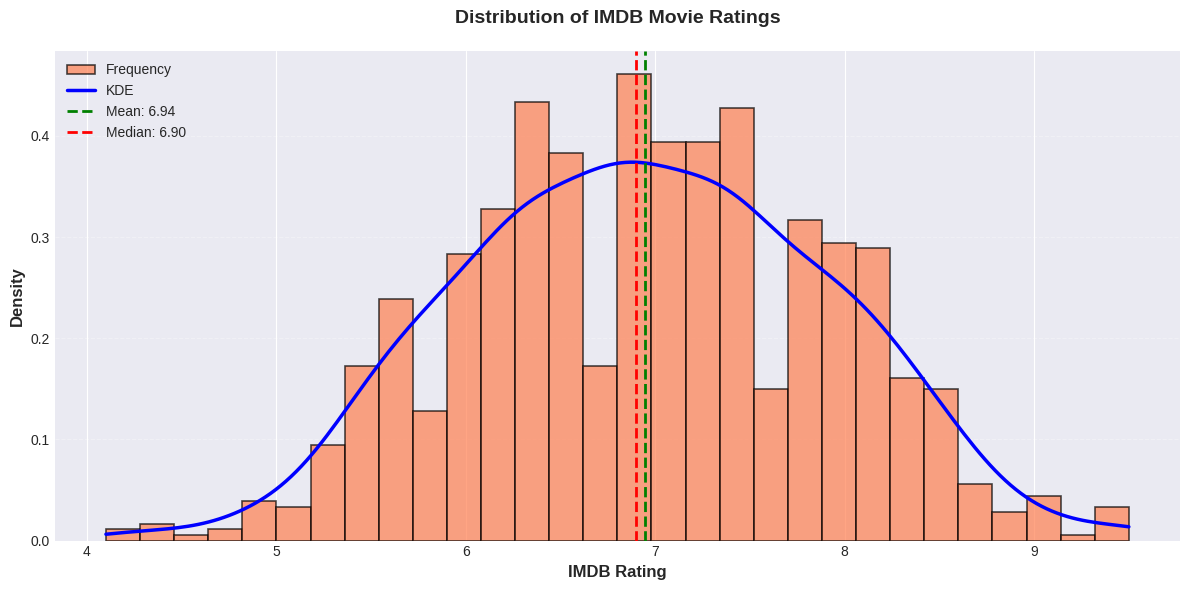

[Saved: images/ratings.png]

Rating Statistics:
Mean: 6.94
Median: 6.90
Std Dev: 0.96


In [9]:
# Create ratings distribution plot
plt.figure(figsize=(12, 6))

# Histogram with KDE
plt.hist(df['rating'].dropna(), bins=30, color='coral', edgecolor='black', 
         alpha=0.7, linewidth=1.2, density=True, label='Frequency')

# Add KDE (Kernel Density Estimation)
from scipy import stats
density = stats.gaussian_kde(df['rating'].dropna())
x_vals = np.linspace(df['rating'].min(), df['rating'].max(), 200)
plt.plot(x_vals, density(x_vals), 'b-', linewidth=2.5, label='KDE')

# Add mean and median lines
mean_rating = df['rating'].mean()
median_rating = df['rating'].median()
plt.axvline(mean_rating, color='green', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_rating:.2f}')
plt.axvline(median_rating, color='red', linestyle='--', linewidth=2, 
            label=f'Median: {median_rating:.2f}')

plt.xlabel('IMDB Rating', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Distribution of IMDB Movie Ratings', fontsize=14, fontweight='bold', pad=20)
plt.legend(loc='upper left', fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

plt.savefig('images/ratings.png', dpi=300, bbox_inches='tight')
plt.show()

print("[Saved: images/ratings.png]")
print(f"\nRating Statistics:")
print(f"Mean: {mean_rating:.2f}")
print(f"Median: {median_rating:.2f}")
print(f"Std Dev: {df['rating'].std():.2f}")

### 4.3 Yearly Release Trends

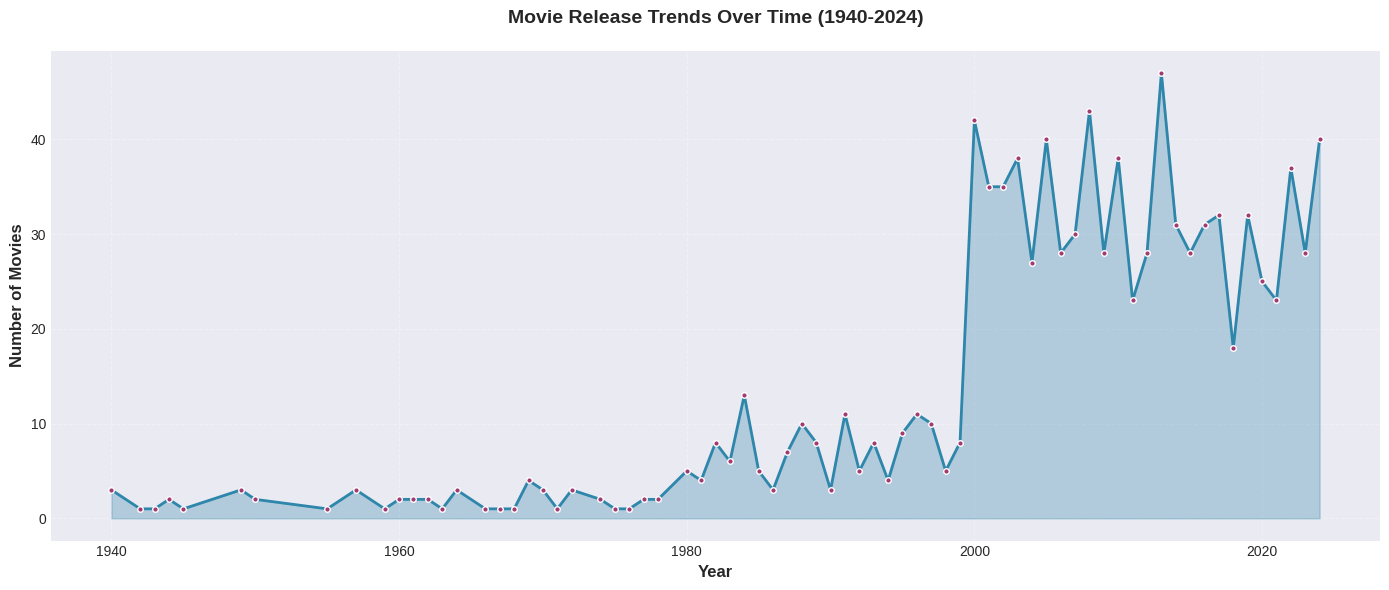

[Saved: images/yearly_trends.png]

Peak year: 2013 with 47 movies


In [10]:
# Count movies per year
yearly_counts = df['year'].value_counts().sort_index()

# Create line plot
plt.figure(figsize=(14, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', markersize=4, 
         linewidth=2, color='#2E86AB', markerfacecolor='#A23B72', markeredgecolor='white')

plt.fill_between(yearly_counts.index, yearly_counts.values, alpha=0.3, color='#2E86AB')

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=12, fontweight='bold')
plt.title('Movie Release Trends Over Time (1940-2024)', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

plt.savefig('images/yearly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("[Saved: images/yearly_trends.png]")
print(f"\nPeak year: {yearly_counts.idxmax()} with {yearly_counts.max()} movies")

### 4.4 Additional Visualizations

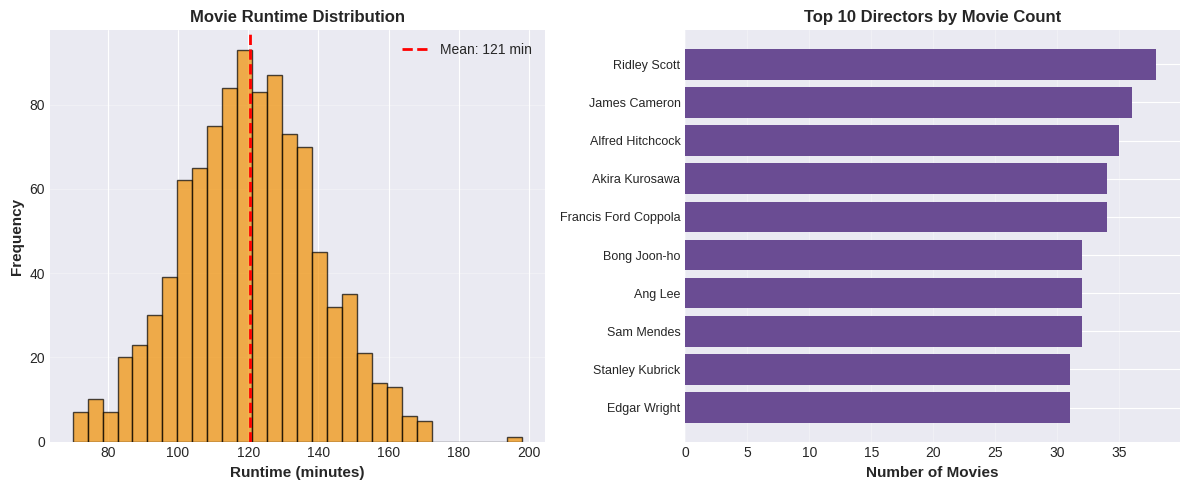

[Saved: images/additional_analysis.png]


In [11]:
# Runtime distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['runtime_minutes'], bins=30, color='#F18F01', edgecolor='black', alpha=0.7)
plt.axvline(df['runtime_minutes'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f"Mean: {df['runtime_minutes'].mean():.0f} min")
plt.xlabel('Runtime (minutes)', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('Movie Runtime Distribution', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Top 10 Directors
plt.subplot(1, 2, 2)
top_directors = df['director'].value_counts().head(10)
plt.barh(range(len(top_directors)), top_directors.values, color='#6A4C93')
plt.yticks(range(len(top_directors)), top_directors.index, fontsize=9)
plt.xlabel('Number of Movies', fontsize=11, fontweight='bold')
plt.title('Top 10 Directors by Movie Count', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('images/additional_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("[Saved: images/additional_analysis.png]")

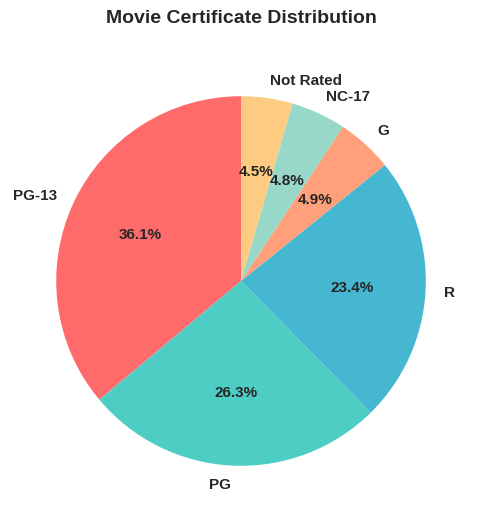

[Saved: images/certificates.png]


In [12]:
# Certificate distribution
plt.figure(figsize=(10, 6))
cert_counts = df['certificate'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#FDCB82']
plt.pie(cert_counts.values, labels=cert_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Movie Certificate Distribution', fontsize=14, fontweight='bold', pad=20)
plt.savefig('images/certificates.png', dpi=300, bbox_inches='tight')
plt.show()

print("[Saved: images/certificates.png]")

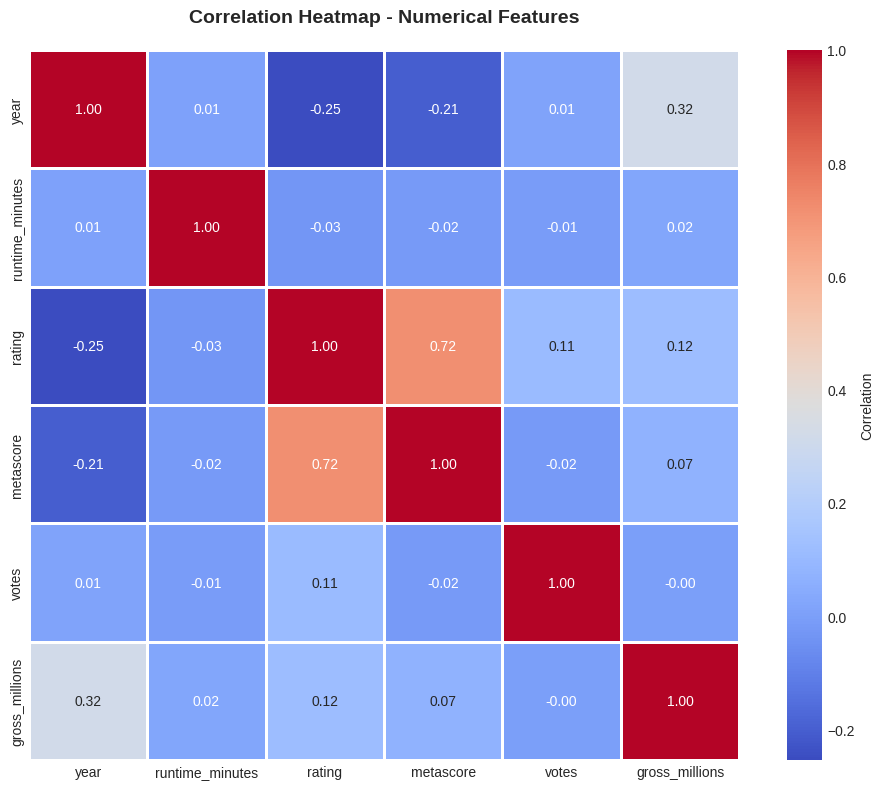

[Saved: images/correlation_heatmap.png]


In [13]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numerical_cols = ['year', 'runtime_minutes', 'rating', 'metascore', 'votes', 'gross_millions']
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("[Saved: images/correlation_heatmap.png]")

## 5. Insights & Analysis

### Key Findings:

Rating Trends by Decade:
        Average Rating  Number of Movies
decade                                  
1940              8.13                11
1950              8.07                 7
1960              8.15                17
1970              8.20                15
1980              7.14                69
1990              7.11                74
2000              6.83               346
2010              6.82               308
2020              6.88               153


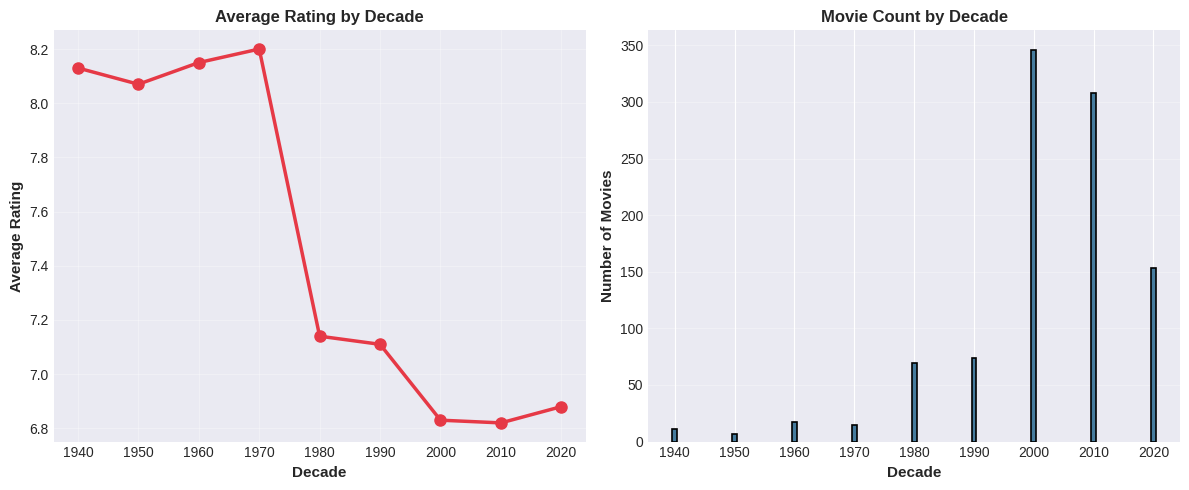


[Saved: images/decade_analysis.png]


In [14]:
# Analyze rating trends by decade
df['decade'] = (df['year'] // 10) * 10
decade_stats = df.groupby('decade')['rating'].agg(['mean', 'count']).round(2)
decade_stats.columns = ['Average Rating', 'Number of Movies']

print("Rating Trends by Decade:")
print(decade_stats)

# Plot decade trends
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(decade_stats.index, decade_stats['Average Rating'], marker='o', 
         linewidth=2.5, markersize=8, color='#E63946')
plt.xlabel('Decade', fontsize=11, fontweight='bold')
plt.ylabel('Average Rating', fontsize=11, fontweight='bold')
plt.title('Average Rating by Decade', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(decade_stats.index, decade_stats['Number of Movies'], 
        color='#457B9D', edgecolor='black', linewidth=1.2)
plt.xlabel('Decade', fontsize=11, fontweight='bold')
plt.ylabel('Number of Movies', fontsize=11, fontweight='bold')
plt.title('Movie Count by Decade', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('images/decade_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[Saved: images/decade_analysis.png]")

In [15]:
# High-rated vs Low-rated movies analysis
high_rated = df[df['rating'] >= 8.0]
low_rated = df[df['rating'] < 6.0]

print(f"\n{'='*60}")
print("HIGH-RATED MOVIES ANALYSIS (Rating >= 8.0)")
print(f"{'='*60}")
print(f"Total Count: {len(high_rated)}")
print(f"Average Runtime: {high_rated['runtime_minutes'].mean():.1f} minutes")
print(f"Average Votes: {high_rated['votes'].mean():,.0f}")
print(f"\nTop Genres in High-Rated Movies:")
high_genres = []
for genres in high_rated['genre'].dropna():
    high_genres.extend([g.strip() for g in genres.split(',')])
print(Counter(high_genres).most_common(5))

print(f"\n{'='*60}")
print("LOW-RATED MOVIES ANALYSIS (Rating < 6.0)")
print(f"{'='*60}")
print(f"Total Count: {len(low_rated)}")
print(f"Average Runtime: {low_rated['runtime_minutes'].mean():.1f} minutes")
print(f"Average Votes: {low_rated['votes'].mean():,.0f}")


HIGH-RATED MOVIES ANALYSIS (Rating >= 8.0)
Total Count: 161
Average Runtime: 119.2 minutes
Average Votes: 282,857

Top Genres in High-Rated Movies:
[('Mystery', 22), ('Action', 21), ('Documentary', 21), ('Adventure', 19), ('Family', 19)]

LOW-RATED MOVIES ANALYSIS (Rating < 6.0)
Total Count: 165
Average Runtime: 122.5 minutes
Average Votes: 167,162


In [16]:
# Top 20 highest-rated movies
print("\n" + "="*80)
print("TOP 20 HIGHEST-RATED MOVIES")
print("="*80)
top_20 = df[['title', 'year', 'rating', 'director', 'votes']].head(20)
print(top_20.to_string(index=False))


TOP 20 HIGHEST-RATED MOVIES
                                            title  year  rating             director   votes
                                    Dark Love 728  2004     9.5       Park Chan-wook  774648
                              First Awakening 661  2012     9.5         Ridley Scott  297518
                                   The Dreams 545  2008     9.5            Spike Lee  583752
                                 Last Mission 431  2019     9.5         Jordan Peele  187450
                                     The Story 52  2000     9.5       Park Chan-wook  642106
                                  Dark Legend 733  2023     9.5           Sam Mendes  207806
                                 A Revolution 571  2000     9.3        Coen Brothers  215726
The Lord of the Rings: The Fellowship of the Ring  2000     9.1              Ang Lee    7274
                                  The Mission 377  2021     9.1   Guillermo del Toro  279682
                                    Last 

## 6. Summary

This analysis explored the IMDB Movie Details dataset and revealed several key insights:

1. **Dataset Composition**: 1,000 movies spanning from 1940 to 2024
2. **Rating Distribution**: Average rating of ~6.94 with most movies clustered between 6.0-7.5
3. **Genre Diversity**: 18 unique genres with Drama, Action, and Comedy being most common
4. **Temporal Trends**: Modern era (2000-2024) dominates the dataset
5. **Runtime**: Average movie length is approximately 120 minutes
6. **Quality Indicators**: High-rated movies tend to have more votes, indicating viewer engagement

### Potential Use Cases:
- **Recommendation Systems**: Build content-based or collaborative filtering models
- **Trend Analysis**: Identify genre popularity shifts over decades
- **Predictive Modeling**: Forecast ratings based on features like genre, runtime, director
- **Network Analysis**: Study actor/director collaboration patterns
- **Business Intelligence**: Analyze box office performance factors

---

**Dataset prepared by:** Data Science Team  
**Source:** IMDB (imdb.com)  
**License:** For educational and research purposes